In [34]:
# !pip install -U scikit-learn

In [35]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The Titanic dataset

Source: https://www.kaggle.com/c/titanic/data

Read the dataframe into a variable called titanic

In [36]:
titanic=pd.read_csv('data/titanic.csv')

In [37]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
titanic.shape

(891, 12)

In [39]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [40]:
titanic['Female']=titanic['Sex'].apply(lambda x: 1 if x=='female' else 0)

In [41]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


# Drop the 'Cabin' for now. 

The problem with Cabin is it has a lot of missing values. We'll see how to handle it later.

In [42]:
titanic=titanic.drop(columns='Cabin')

# Count the number of missing on the dataset

After counting the number of missings, drop the them. We'll come back at them later.

In [43]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Female           0
dtype: int64

In [44]:
titanic=titanic.dropna(subset=['Age'])

In [45]:
titanic=titanic.dropna(subset=['Embarked'])

Check how much data we've dropped. And check the number of missings in the dataset again just to check if you droped it correctly.

In [46]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Female         0
dtype: int64

# Check some statistics of the dataset

Use `.describe()` on the resulting dataset to check some patterns on the numerical columns

In [47]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Female
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251,0.363764
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648,0.481420
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000,0.000000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850,0.000000
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000


# Visualizing relationships

Try to use a scatterplot on the dataframe columns 'Age' vs 'Survived' to see if you can have some insights

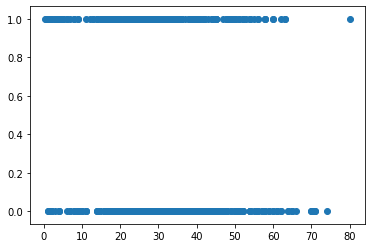

In [48]:
plt.scatter(titanic['Age'],titanic['Survived'])

Now do the same for the columns 'Fare' and 'Survived'

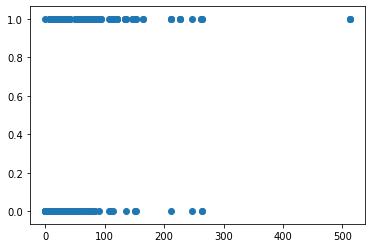

In [49]:
plt.scatter(titanic['Fare'],titanic['Survived'])

# Is there any better visualization technique to handle binary data? If so, use it to try to understand the effect of Age in the variable Survived

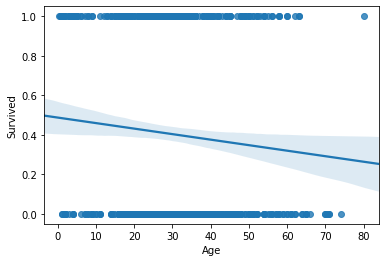

In [50]:
sns.regplot(titanic['Age'],titanic['Survived'])

# Cross Tab

Sometimes the plots above can reveal some important insights - specially if you have used some kind of, however, a better way to obtain these insights would be to use the `pd.crosstab()` 
function. Use it to explore the relations between `Age` and `Survived`. 

In [51]:
pd.crosstab(titanic['Age'],titanic['Survived'])

Survived,0,1
Age,,
0.42,0,1
0.67,0,1
0.75,0,2
0.83,0,2
0.92,0,1
...,...,...
70.00,2,0
70.50,1,0
71.00,2,0


Now perform the same operation for `Pclass` and `Survived`

In [52]:
pd.crosstab(titanic['Pclass'],titanic['Survived'])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


What can you infer from that?

In [53]:
# It seems to have a correlation between age/pclass and survived

# Correlations

Can you infer the same using a correlation table?

In [54]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Female
PassengerId,1.000000,0.029526,-0.035609,0.033681,-0.082704,-0.011672,0.009655,-0.024674
Survived,0.029526,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100,0.536762
Pclass,-0.035609,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893,-0.150826
Age,0.033681,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143,-0.099037
SibSp,-0.082704,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860,0.106296
Parch,-0.011672,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624,0.249543
Fare,0.009655,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000,0.182457
Female,-0.024674,0.536762,-0.150826,-0.099037,0.106296,0.249543,0.182457,1.000000


# Plot the distribution of the Age variable for each category of the `Survived` variable in the same plot. 

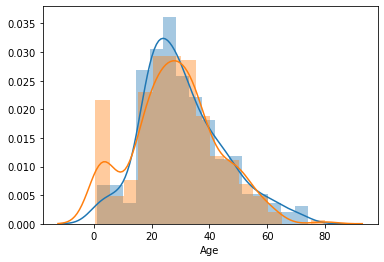

In [55]:
sns.distplot(titanic.loc[titanic['Survived']==0,'Age'])
sns.distplot(titanic.loc[titanic['Survived']==1,'Age'])

# Now try to plot the same distribution but break the group into 
1. Survived, less than 18 years old male 
2. NOT Survived, less than 18 years old male 

And plot their `Age` distributions in the same graph.

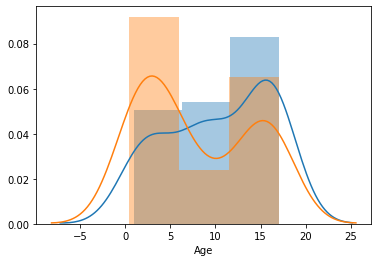

In [56]:
sns.distplot(titanic.loc[(titanic['Survived']==0) & (titanic['Age']<18),'Age'])
sns.distplot(titanic.loc[(titanic['Survived']==1) & (titanic['Age']<18),'Age'])

# For these groups above, calculate their average of survivalness.

You probably observed a discrimination of Surivavalness around 9 years old. For this exercise, you need to calculate the average of survivalness for each of these groups to survive. Again, filter the dataset into two subgroups:

1. Males with ages less than 9
2. Males with ages greater than 9 and less than 18

What are their average survival?

In [57]:
titanic.loc[(titanic['Female']==0) & (titanic['Age']<=9),'Survived'].mean()

0.59375

In [58]:
titanic.loc[(titanic['Female']==0) & (titanic['Age']>9) & (titanic['Age']<18),'Survived'].mean()

0.15384615384615385

# Prepare data for our first model

### Let's start simple. 

First create a variable named `X` containing the variables `['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']`. 


In [61]:
X=titanic[['Pclass','Female','Age','SibSp','Parch','Fare']]

Also create a pandas series containing the variable Survived. Store it in the variable `y`.

In [62]:
y=titanic['Survived']

# Prepare your validation strategy

We'll use the validation strategy called `holdout`. For this strategy, the idea is to hide part of your dataframe to estimate the error on a data you haven't seen before. 

So you'll be able to use part of your dataset to train your model and then use the never-seen part of your dataset to have a good estimate of the error when the model goes to production.

## Separate your `X` dataset into a dataset called `X_train` and another called `X_test`. Of course, also create a pandas series containing `y_train` and `y_test`. 

In [63]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

# You'll be able to concat the `X_train` and `y_train`. Do the same for `X_test` and `y_test`. Put them into dataframes called `titanic_train` and `titanic_test`

In [67]:
titanic_train=pd.concat([X_train, y_train], axis=1)

In [69]:
titanic_test=pd.concat([X_test, y_test], axis=1)

# And store it on your own folder.

In [70]:
titanic_train.to_csv('data/titanic_train.csv', index=False)
titanic_test.to_csv('data/titanic_test.csv', index=False)